# OPAL collider tracking example

By Carl A. Lindstrøm (University of Oslo), 2 Jun 2023

### Import OPAL framework and required classes

In [1]:
import sys
sys.path.append('../')
from opal import *
import numpy as np

### Define the collider elements

In [2]:
# define driver
driver = SourceBasic()
driver.charge = -5e-9 # [C]
driver.energy = 10e9 # [eV]
driver.rel_energy_spread = 0.01
driver.bunch_length = 20e-6 # [m]
driver.z_offset = 120e-6 # [m]
driver.emit_nx, driver.emit_ny = 10e-6, 10e-6 # [m rad]
driver.beta_x, driver.beta_y = 30e-3, 30e-3 # [m]
driver.num_particles = 5000
driver.wallplug_efficiency = 0.5

# define stage
stage = StageNonlinear1d()
stage.driver_source = driver
stage.nom_energy_gain = 5.5e9 # [eV]
stage.length = 1 # [m]
stage.plasma_density = 2e22 # [m^-3]
stage.ramp_beta_mag = 10

# define beam
source = SourceBasic()
source.charge = -2.7e-9 # [C]
source.energy = 3e9 # [eV]
source.rel_energy_spread = 0.005
source.bunch_length = 12e-6 # [m]
source.z_offset = -60e-6 # [m]
source.emit_nx, source.emit_ny = 10e-6, 0.035e-6 # [m rad]
source.beta_x = stage.get_matched_beta_function(source.energy)
source.beta_y = source.beta_x
source.num_particles = 1000
source.wallplug_efficiency = 0.1
source.accel_gradient = 25e6 # [V/m]

# define interstage
interstage = InterstageElegant()
interstage.beta0 = lambda E: stage.get_matched_beta_function(E)
interstage.dipole_length = lambda E: 1 * np.sqrt(E/10e9) # [m(eV)]
interstage.dipole_field = 0.5 # [T]

# beam delivery system
bds = BeamDeliverySystemBasic()
bds.beta_x, bds.beta_y = 8e-3, 0.4e-3 # [m]
bds.bunch_length = 0.75 * bds.beta_y

# define linac
linac = Linac(source, stage, interstage, bds, num_stages=14)

# define interaction point
ip = InteractionPointBasic()

# define collider (with two identical linacs)
collider = Collider(linac, ip)

### Perform collider tracking

In [3]:
# track particles
collider.run("collider_example", shots=3, overwrite=False);

>> LINAC #1
>> SHOT #1
Tracking element #1 (s = 120.0 m, -2.70 nC, 3.0 GeV, SourceBasic, stage 0)
Tracking element #2 (s = 121.0 m, -2.70 nC, 8.6 GeV, StageNonlinear1d, stage 1)
Tracking element #3 (s = 126.0 m, -2.70 nC, 8.6 GeV, InterstageElegant, stage 1)
Tracking element #4 (s = 127.0 m, -2.70 nC, 14.2 GeV, StageNonlinear1d, stage 2)
Tracking element #5 (s = 133.4 m, -2.70 nC, 14.2 GeV, InterstageElegant, stage 2)
Tracking element #6 (s = 134.4 m, -2.69 nC, 19.9 GeV, StageNonlinear1d, stage 3)
Tracking element #7 (s = 142.0 m, -2.69 nC, 19.9 GeV, InterstageElegant, stage 3)
Tracking element #8 (s = 143.0 m, -2.69 nC, 25.4 GeV, StageNonlinear1d, stage 4)
Tracking element #9 (s = 151.6 m, -2.69 nC, 25.4 GeV, InterstageElegant, stage 4)
Tracking element #10 (s = 152.6 m, -2.68 nC, 31.0 GeV, StageNonlinear1d, stage 5)
Tracking element #11 (s = 162.0 m, -2.68 nC, 31.0 GeV, InterstageElegant, stage 5)
Tracking element #12 (s = 163.0 m, -2.68 nC, 36.4 GeV, StageNonlinear1d, stage 6)
Track

### Plot the wakefield structure

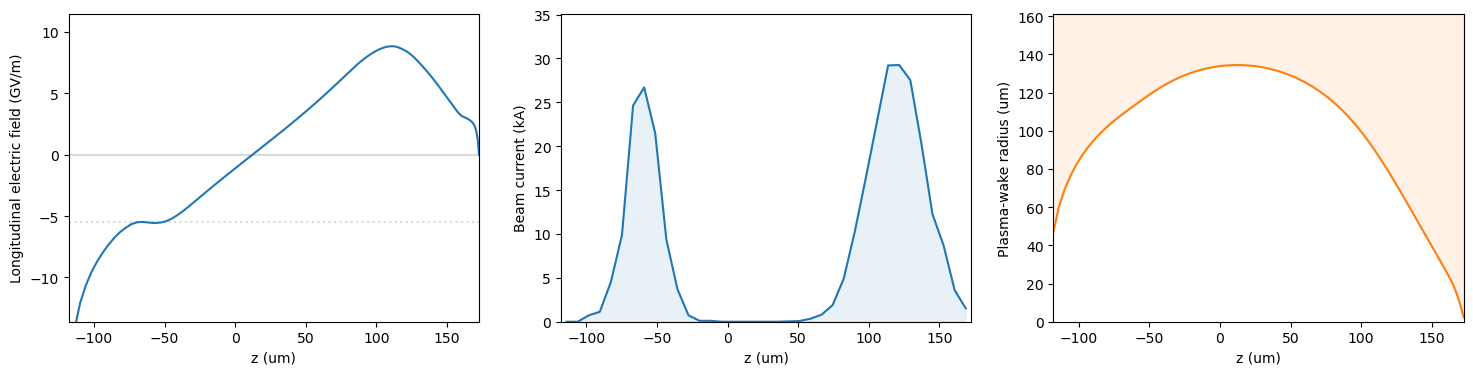

In [4]:
# plot wakefield
stage.plot_wakefield(linac.initial_beam())

### Plot the beam evolution in the linac

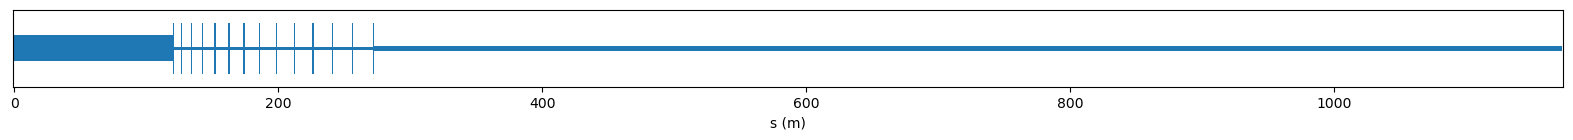

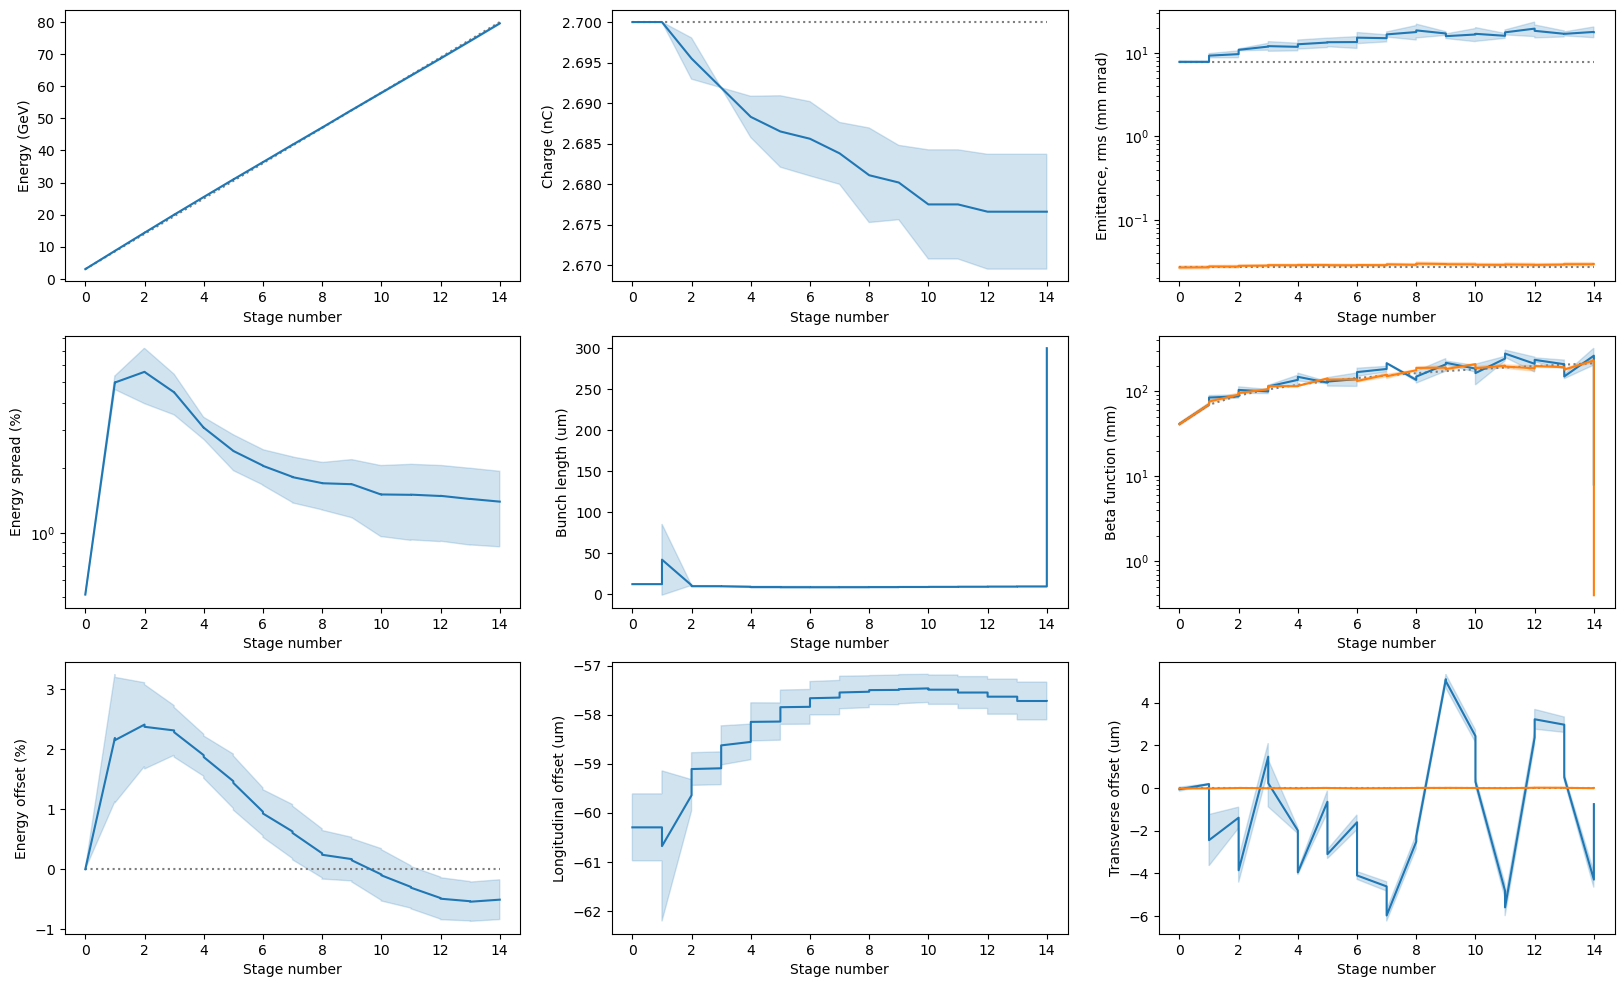

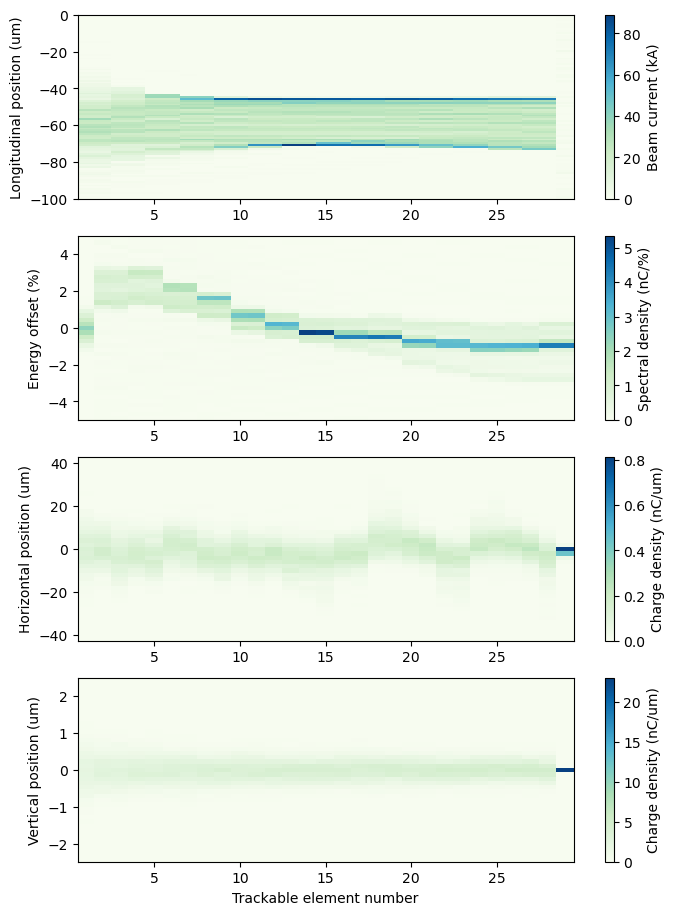

In [5]:
# plot beam evolution and linac survey
linac.plot_survey()
linac.plot_evolution(use_stage_nums=True)
linac.plot_waterfalls()

### Plot the collider luminosity

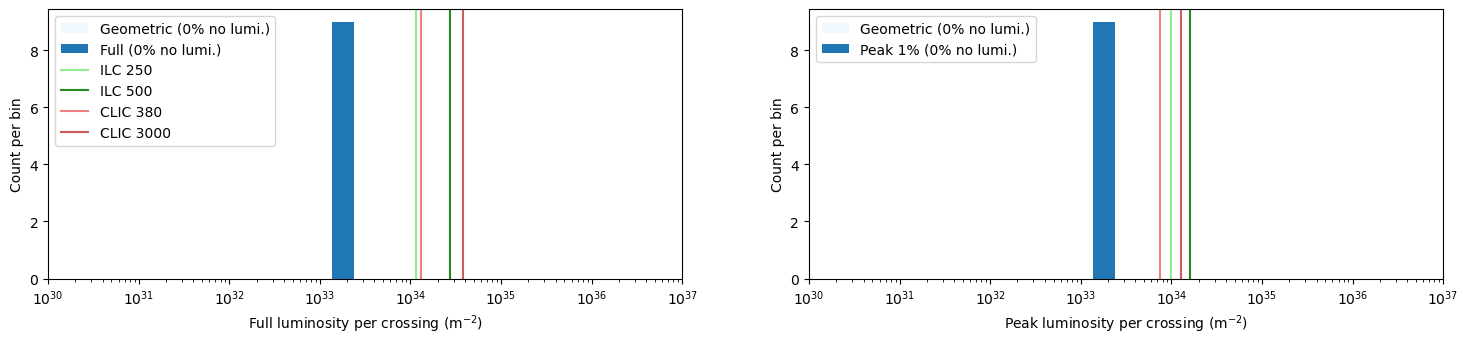

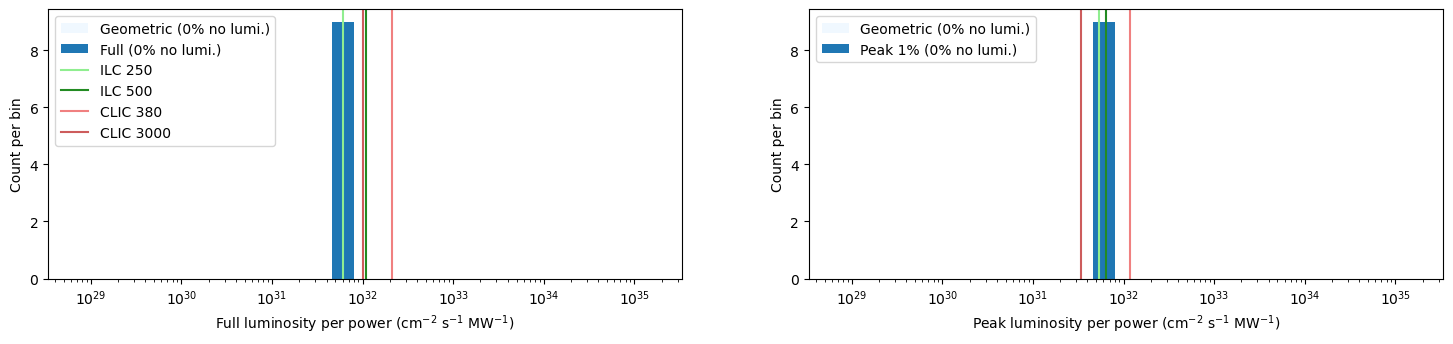

In [6]:
# plot luminosity
collider.plot_luminosity()

# plot luminosity per power
collider.plot_luminosity_per_power()